<a href="https://colab.research.google.com/github/ssandeep630241/image-classification-for-food/blob/main/Dl_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Necessary packages
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
features = dataset.drop(labels=['CustomerId', 'Surname', 'RowNumber', 'Exited'], axis = 1)
target  = dataset['Exited']
features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
features = pd.get_dummies(features, prefix=['geo'],columns=['Geography'])
features.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geo_France,geo_Germany,geo_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,True,False,False
1,608,Female,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,Female,42,8,159660.80,3,1,0,113931.57,True,False,False
3,699,Female,39,1,0.00,2,0,0,93826.63,True,False,False
4,850,Female,43,2,125510.82,1,1,1,79084.10,False,False,True


In [ ]:
label1 = LabelEncoder()
features['Gender'] = label1.fit_transform(features['Gender'])
features.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geo_France,geo_Germany,geo_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,False,False,True


In [ ]:
train,test,trainlabel,testlabel = train_test_split(features, target, test_size = 0.2, random_state = 1)

In [ ]:
print("Training samples:" , train.shape[0])
print("Testing samples:" ,test.shape[0])
print("Training sample size:",train.shape)
print("Testing sample size:",test.shape)

Training samples: 8000
Testing samples: 2000
Training sample size: (8000, 12)
Testing sample size: (2000, 12)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train = sc.fit_transform(train)# Scaling fitted only to training set to avoid information leakage.
test = sc.transform(test)

In [ ]:
#Create a variable to represent the ANN model as an instance
model = Sequential([
        keras.layers.Dense(units=32,activation="relu",kernel_initializer="normal",input_dim = 12), #input layer and hidden layer
        keras.layers.Dense(units=16,activation="relu",kernel_initializer="normal"), #hidden layer
        keras.layers.Dense(units=1,activation="sigmoid",kernel_initializer="normal") #output layer
      ])


In [ ]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train,trainlabel,batch_size=20,epochs = 100) #model run for 100 epochs

Epoch 1/100
400/400 [==============================] - 2s 2ms/step - loss: 0.4822 - accuracy: 0.7955
Epoch 2/100
400/400 [==============================] - 1s 2ms/step - loss: 0.4231 - accuracy: 0.8126
Epoch 3/100
400/400 [==============================] - 1s 2ms/step - loss: 0.4120 - accuracy: 0.8329
Epoch 4/100
400/400 [==============================] - 1s 3ms/step - loss: 0.4047 - accuracy: 0.8354
Epoch 5/100
400/400 [==============================] - 1s 3ms/step - loss: 0.4005 - accuracy: 0.8370
Epoch 6/100
400/400 [==============================] - 1s 3ms/step - loss: 0.3946 - accuracy: 0.8393
Epoch 7/100
400/400 [==============================] - 1s 3ms/step - loss: 0.3764 - accuracy: 0.8470
Epoch 8/100
400/400 [==============================] - 1s 3ms/step - loss: 0.3527 - accuracy: 0.8564
Epoch 9/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3419 - accuracy: 0.8621
Epoch 10/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3383 - accura

In [ ]:
loss,acc = model.evaluate(test,testlabel)
print("Test Accuarcy:",acc)
print("Tets Loss:",loss)

63/63 [==============================] - 0s 3ms/step - loss: 0.3493 - accuracy: 0.8575
Test Accuarcy: 0.8575000166893005
Tets Loss: 0.34926676750183105


In [ ]:
model.save("/content/drive/MyDrive/trained model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/trained model.h5")
trainloss , trainaccuracy = model.evaluate(train,trainlabel)
testloss, testaccuracy = model.evaluate(test,testlabel)
print('Train loss:', trainloss)
print('Train accuracy:', 100*trainaccuracy)
print('Test loss:', testloss)
print('Test accuracy:', 100*testaccuracy)

63/63 [==============================] - 0s 3ms/step - loss: 0.3493 - accuracy: 0.8575
Train loss: 0.306863009929657
Train accuracy: 87.1625006198883
Test loss: 0.34926676750183105
Test accuracy: 85.75000166893005


63/63 [==============================] - 0s 2ms/step


Text(95.72222222222221, 0.5, 'Expected')

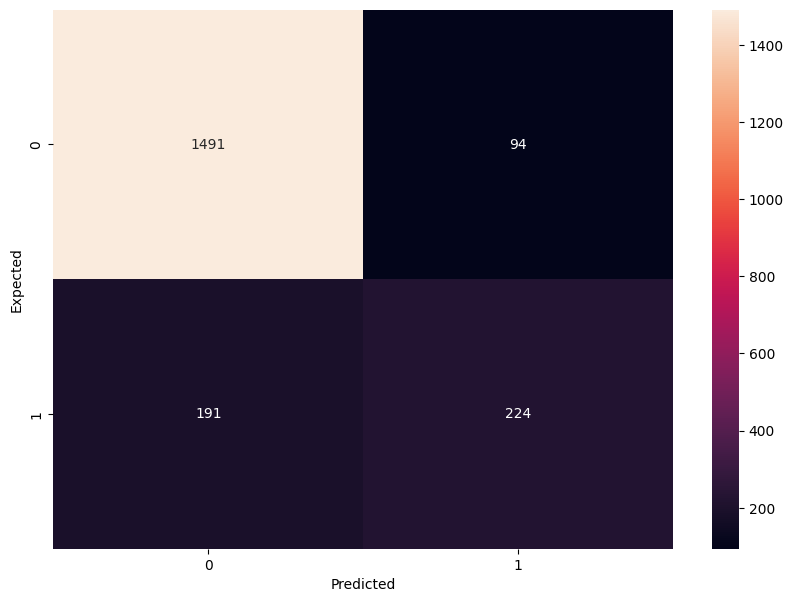

In [ ]:
y_predicted = model.predict(test)
y_predicted_labels = y_predicted > 0.5
cm = tf.math.confusion_matrix(labels=testlabel,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Expected')

In [ ]:
#PRECISION
precision_0 = round(1548 / (1548+244),2)
precision_1 = round(171 / (171+37),2)

print("Precision for customers who did not leave the bank:",precision_0)
print("Precision for customers who left the bank:",precision_1)

Precision for customers who did not leave the bank: 0.86
Precision for customers who left the bank: 0.82


In [ ]:
#RECALL
recall_0 = round(1548 / (1548+37),2)
recall_1 = round(171 / (171+244),2)

print("Recall for customers who did not leave the bank:",recall_0)
print("Recall for customers who left the bank:",recall_1)

Recall for customers who did not leave the bank: 0.98
Recall for customers who left the bank: 0.41


In [ ]:
#F1 SCORE
f1_score_0 = round(2 * ((precision_0 * recall_0) / (precision_0 + recall_0)),2)
f1_score_1 = round(2 * ((precision_1 * recall_1) / (precision_1 + recall_1)),2)

print("F1 score for customers who did not leave the bank:",f1_score_0)
print("F1 score for customers who left the bank:",f1_score_1)

F1 score for customers who did not leave the bank: 0.92
F1 score for customers who left the bank: 0.55


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(testlabel,y_predicted_labels))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1585
           1       0.70      0.54      0.61       415

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



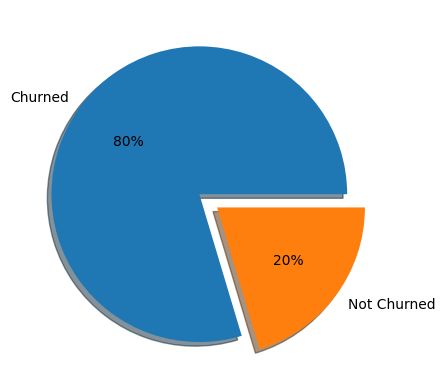

In [ ]:
import matplotlib.pyplot as plt

output = dataset['Exited'].value_counts() #counting the number of entries for values of Exited i.e 0,1
out_labels = ['Churned','Not Churned']
out_explode = [0,0.15]

plt.pie(output, labels=out_labels, explode=out_explode, autopct='%1.0f%%',shadow=True)
plt.show()

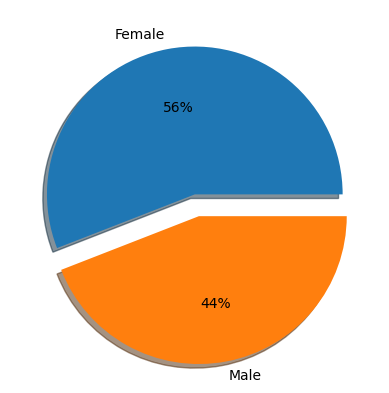

NameError: name 'geo_count' is not defined

In [ ]:
df_cond = dataset['Exited'].values==1
df_churned = dataset[df_cond]          #dataset containing only churned entries
gen_count = df_churned['Gender'].value_counts()   #counting the number of entries for each gender in churned dataset
gen_labels = ['Female','Male']
gen_explode = [0,0.15]

plt.pie(gen_count, labels=gen_labels, explode=gen_explode, autopct='%1.0f%%',shadow=True)
plt.show()
gen_countgeo_count = df_churned['Geography'].value_counts() #counting the number of entries for each country in chuned dataset
geo_labels = ['France','Germany','Spain']
geo_explode = [0,0.1,0.15]

plt.pie(geo_count,labels = geo_labels,explode = geo_explode, autopct = '%1.0f%%',shadow = True)
plt.show()
geo_count

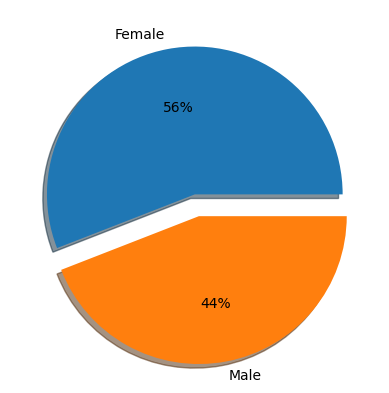

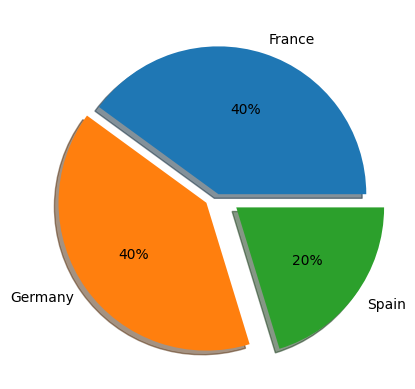

Geography
Germany    814
France     810
Spain      413
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

df_cond = dataset['Exited'].values==1
df_churned = dataset[df_cond]          #dataset containing only churned entries
gen_count = df_churned['Gender'].value_counts()   #counting the number of entries for each gender in churned dataset
gen_labels = ['Female','Male']
gen_explode = [0,0.15]

plt.pie(gen_count, labels=gen_labels, explode=gen_explode, autopct='%1.0f%%',shadow=True)
plt.show()

# Use the correct variable name here
geo_count = df_churned['Geography'].value_counts() #counting the number of entries for each country in chuned dataset
geo_labels = ['France','Germany','Spain']
geo_explode = [0,0.1,0.15]

plt.pie(geo_count,labels = geo_labels,explode = geo_explode, autopct = '%1.0f%%',shadow = True)
plt.show()
geo_count

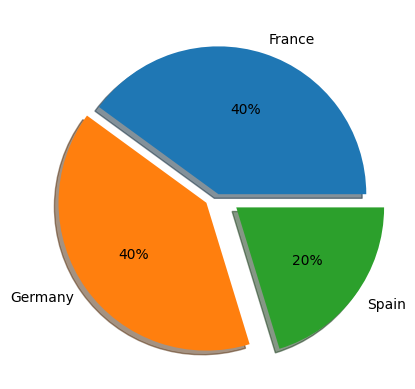

Geography
Germany    814
France     810
Spain      413
Name: count, dtype: int64

In [ ]:
geo_count = df_churned['Geography'].value_counts() #counting the number of entries for each country in chuned dataset
geo_labels = ['France','Germany','Spain']
geo_explode = [0,0.1,0.15]

plt.pie(geo_count,labels = geo_labels,explode = geo_explode, autopct = '%1.0f%%',shadow = True)
plt.show()
geo_count

In [ ]:
df_cond = dataset['Exited'].values==0
df_notchurned = dataset[df_cond]

df_notchurned['NumOfProducts'].value_counts() #count for each value of NumOfProducts of non-churned customer

NumOfProducts
2    4242
1    3675
3      46
Name: count, dtype: int64

In [ ]:
df_churned['NumOfProducts'].value_counts()  #count for each value of NumOfProducts of churned customer

NumOfProducts
1    1409
2     348
3     220
4      60
Name: count, dtype: int64

<Axes: xlabel='NumOfProducts'>

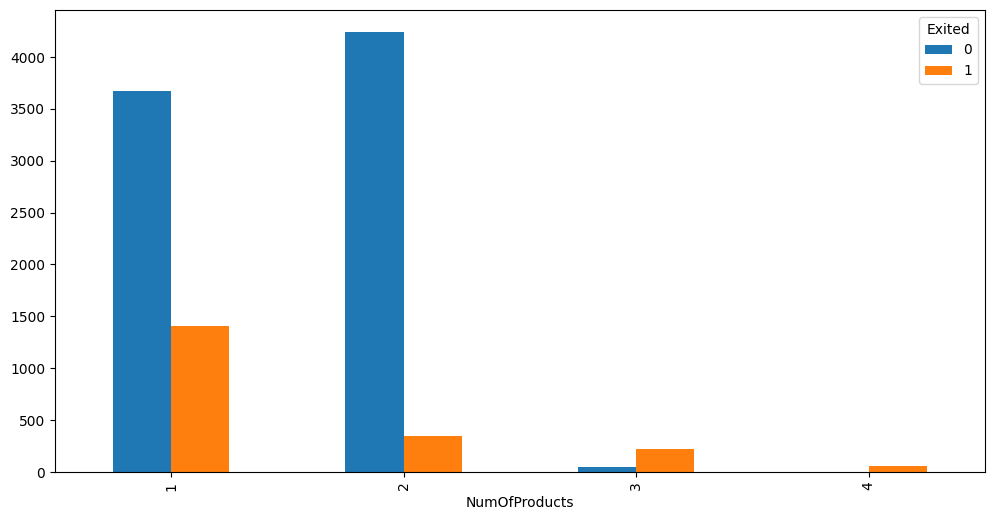

In [ ]:
dataset.groupby('Exited')['NumOfProducts'].value_counts().unstack('Exited').plot.bar(figsize=(12,6))

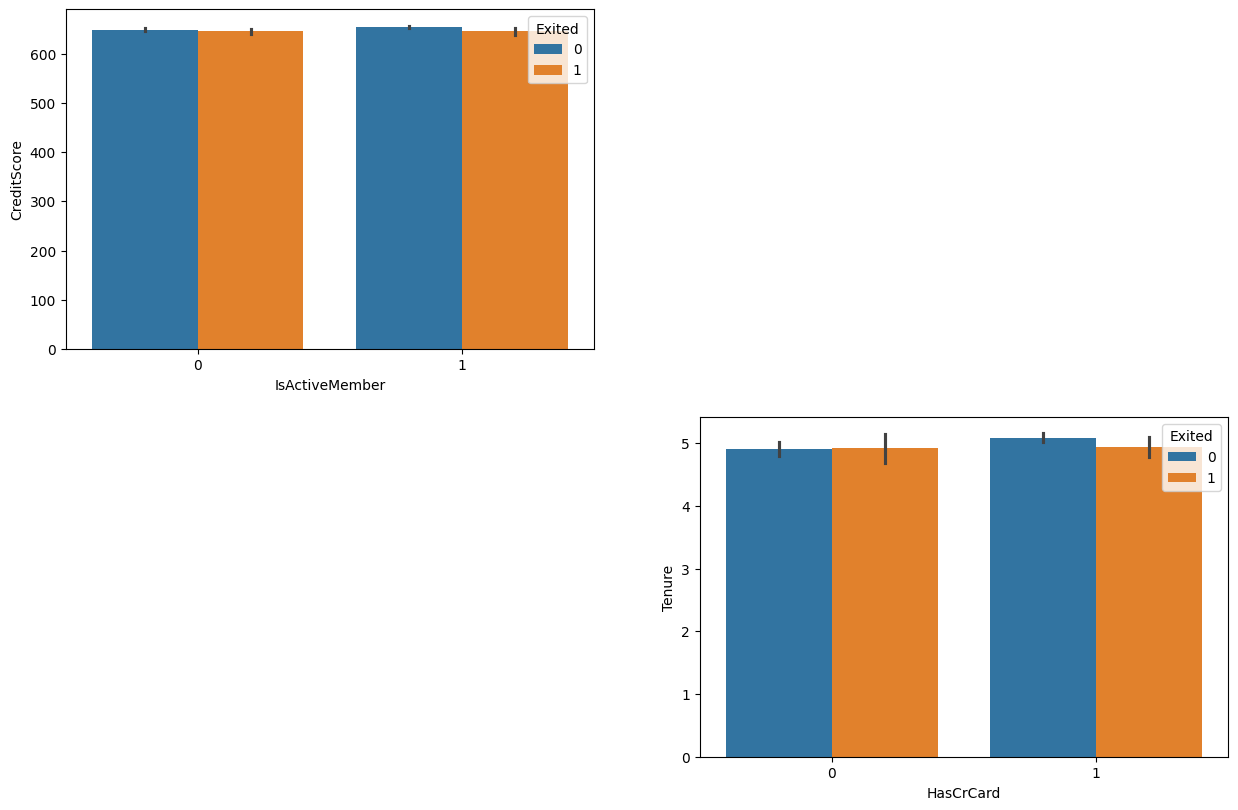

In [ ]:

# Analaysing the effect of being an active member and having credit card and whether or not they have exited.

plt.figure(figsize = (15,15))

# Plots the bar chart for IsActiveMember(x-axis) with CreditScore(y-axis) and categorises IsActiveMember further as people who Exited vs Not Exited.
plt.subplot(3,2,1)
_= sn.barplot(x='IsActiveMember',y = 'CreditScore', hue = 'Exited',data = dataset)

# Plots the bar chart for HasCrCard(x-axis) with Tenure(y-axis) and categorises HasCrCard further as people who Exited vs Not Exited.
plt.subplot(3,2,4)
_= sn.barplot(x='HasCrCard',y = 'Tenure',hue = 'Exited',data = dataset)

Minimum Age : 18
Maximum Age : 92


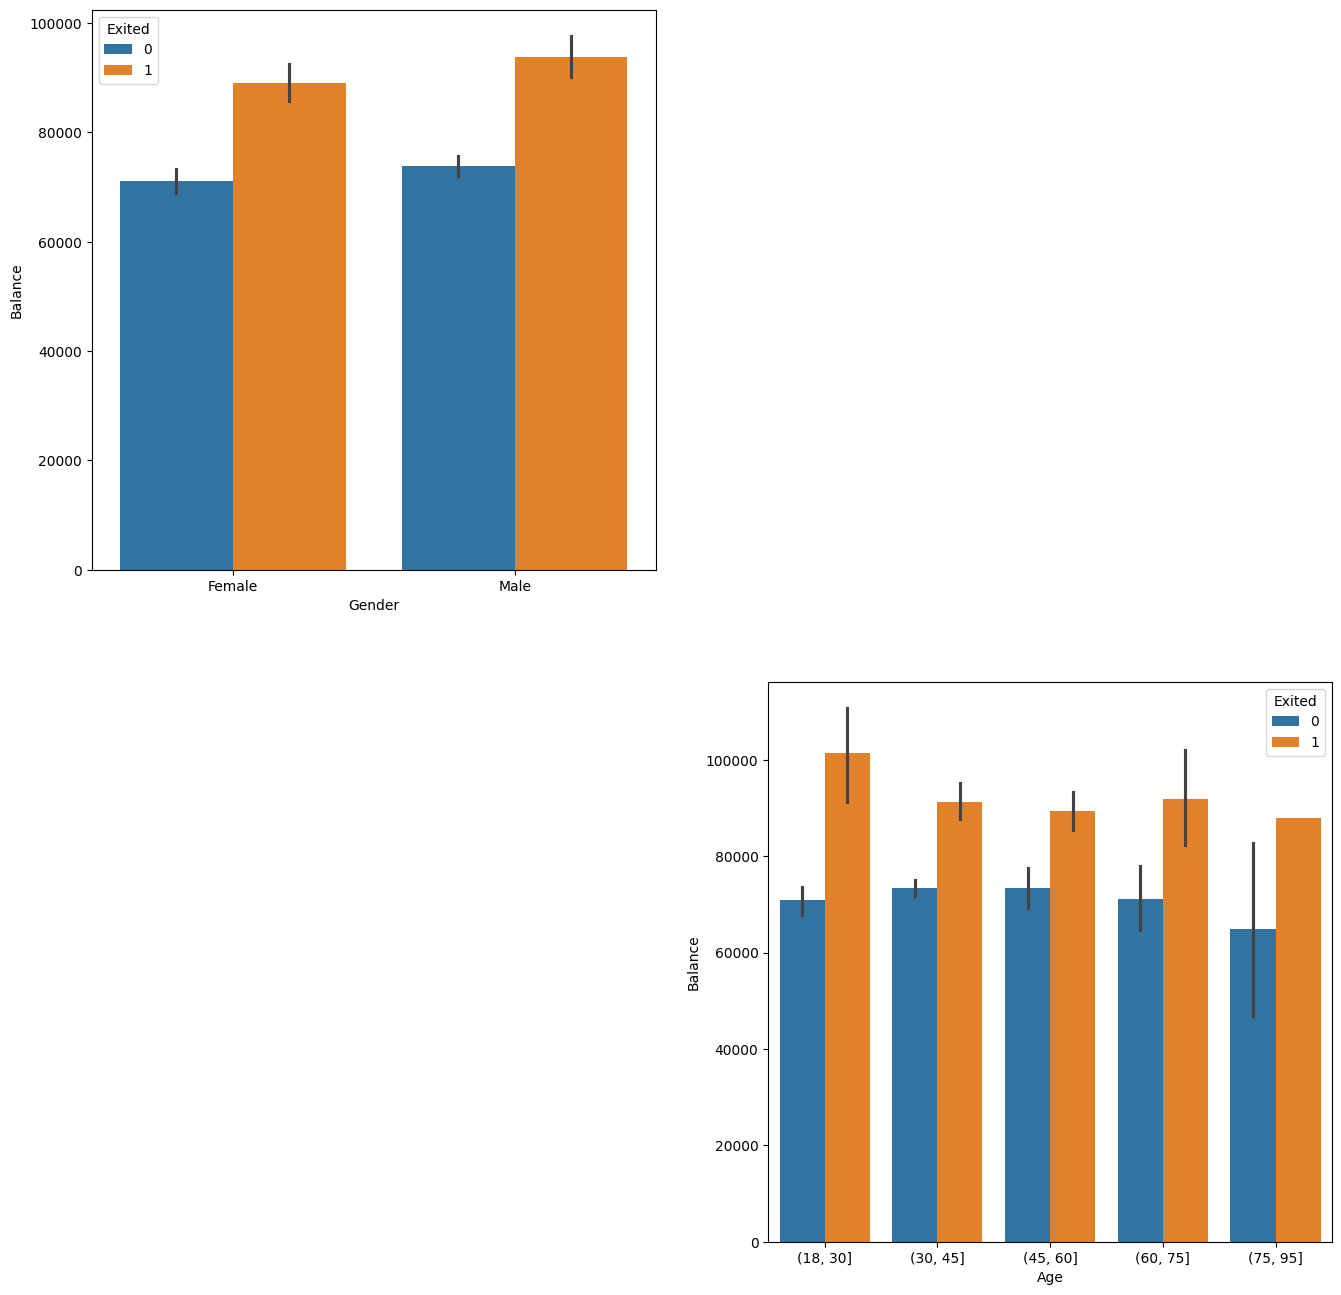

In [ ]:
# we need to know the min and max value of Age attribute inorder to stratify it
print("Minimum Age : " + str(min(dataset['Age'])))
print("Maximum Age : " + str(max(dataset['Age'])))

# Creating a temporary DataFrame
tempDf = pd.DataFrame()

# pd.cut() categorizes each Age value to fit in the specified cut range. Age is generalised to specific ranges for the purpose of plotting and analysing
tempDf['Age'] = pd.cut(dataset.Age, [18,30,45,60,75,95])
tempDf['Exited'] = dataset['Exited']
tempDf['Gender'] = dataset['Gender']
tempDf['Balance'] = dataset['Balance']

plt.figure(figsize = (16,16))

# Plots the bar chart for Gender(x-axis) with Balance(y-axis) and categorises gender as people who Exited vs Not Exited
plt.subplot(2,2,1)
_= sn.barplot(x='Gender',y = 'Balance', hue = 'Exited', data = tempDf)

# Plots the bar chart for Age(x-axis) with Balance(y-axis) and categorises gender as people who Exited vs Not Exited
plt.subplot(2,2,4)
_= sn.barplot(x = 'Age', y = 'Balance', hue = 'Exited', data = tempDf)

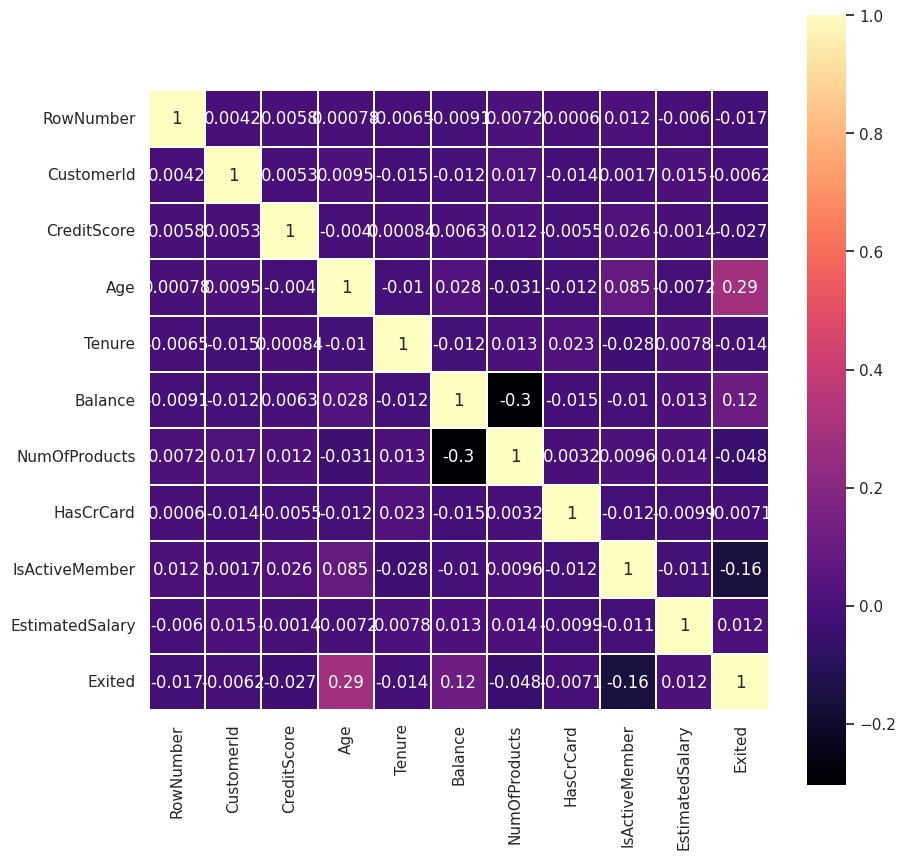

In [ ]:
plt.figure(figsize=(10, 10))
sn.set(style = 'white')
sn.heatmap(dataset.select_dtypes(include='number').corr(), annot = True, cmap = 'magma', square = True, linewidths=0.1);

In [ ]:
result = model.predict(sc.transform([[600, 1, 40, 3, 60000, 2, 1, 1, 50000, 1, 0, 0]]))
print(result)
if result>0.5:
   print("Customer will leave the bank in the future")
else:
   print("Customer will not leave the bank in the future")

1/1 [==============================] - 0s 33ms/step
[[0.01966815]]
Customer will not leave the bank in the future


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
result = model.predict(sc.transform([[550, 0, 30, 2, 80000, 4, 1, 0, 70000, 0, 1, 0]]))
print(result)
if result>0.5:
   print("Customer will leave the bank in the future")
else:
   print("Customer will not leave the bank in the future")

1/1 [==============================] - 0s 22ms/step
[[0.99912786]]
Customer will leave the bank in the future


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
